In [1]:
import pigmentosa

ModuleNotFoundError: No module named 'pigmentosa'

In [2]:
import seaborn

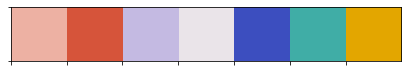

In [304]:
blonde = ['#edb1a3','#d6543a','#c4bae2','#eae4e9','#3c4ebf','#40ada6','#e3a600']
seaborn.palplot(blonde)

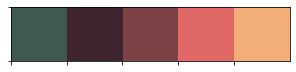

In [4]:
selah = ['#405950','#3e242f','#7d4246','#e06865','#f3ad78']
seaborn.palplot(selah)

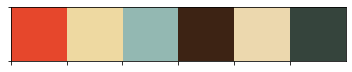

In [5]:
lazarus = ['#e6472c','#eed9a1','#93b8b2','#3d2314','#ecd8ae','#35443c']
seaborn.palplot(lazarus)

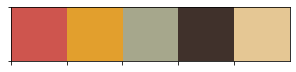

In [6]:
molasses = ['#ce554e','#e29f2d','#a6a78c','#40312b','#e5c794',]
seaborn.palplot(molasses)

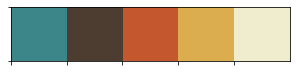

In [7]:
crepuscle = ['#3c8588','#4d3d31','#c5572e','#dbad4e','#efedce',]
seaborn.palplot(crepuscle)

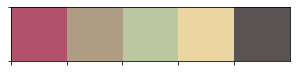

In [8]:
mulberry = ['#b1516a','#af9c85','#bbc9a2','#ebd5a2','#595353']
seaborn.palplot(mulberry)

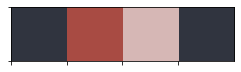

In [290]:
inkling = ['#30343f','#a84b43','#d6b7b5','#30343f']
seaborn.palplot(inkling)

In [26]:
import numpy as np
import pandas as pd
import bokeh.io
import bokeh.plotting
bokeh.io.output_notebook()

Loading BokehJS ...

In [251]:
def hex_to_rgb(palette):
    return [tuple(int(h.lstrip("#")[i:i+2], 16) for i in (0, 2, 4)) for h in palette]

In [308]:
def palplot(palette, plot='all',):
    """
    Displays palette via bokeh. Hover for hex value.
    Arguments
    ---------
    palette : pass in list of hex values
    plot : 'swatch' for squares, 
        'pie' for wedges,
        'scatter' for scatter,
        'all' for all
    """
    
    TOOLTIPS = """
            <div>
                <div>
                    <span style="font-size:15px; font-weight:bold; color:midnightblue;">@palette</span> <br>
                    <span style="font-size:12px; font-weight:bold; color:lapisblue;">(@rgb)</span> <br>
                </div>
            </div>
            """
    
    
    if plot=="swatch":
        df = pd.DataFrame(dict(palette=palette,
                           x=np.arange(len(palette)),
                           y=[0]*len(palette)
                          ))
        df['hex']=palette
        df['rgb']=hex_to_rgb(palette)
        
        height = 60
        width = height*len(palette)
        size = height/1.2
        swatch = bokeh.plotting.figure(width=width, height=height, x_range=(-1,len(palette)),tooltips=TOOLTIPS)
        
        swatch.square(source=df, x='x',y='y', size=size, color='palette')

        swatch.axis.visible=False
        swatch.grid.grid_line_color=None
        swatch.toolbar.autohide=True
        bokeh.io.show(swatch)
        
        
    if plot=="pie":
        width, height = 350,350
        
        angles = [0.216875, 0.1545, 0.127375, 0.1069, 0.103925,
                 0.055875, 0.04665,0.0355, 0.032275, 0.03, 0.018975, 
                 0.0131, 0.0128, 0.00925, 0.007075, 0.00635, 0.005125,
                 0.003825, 0.003525, 0.002925, 0.002, 0.0013, 0.001, 0.002875]
        df = pd.DataFrame(dict(
                       angle=[a*2*np.pi for a in angles], 
                       palette=(palette*10)[:len(angles)],
                      ))
        df['hex']=(palette*10)[:len(angles)]
        df['rgb']=hex_to_rgb((palette*10)[:len(angles)])
        
        pie = bokeh.plotting.figure(width=width, height=height,x_range=(-1.1,1.1),tooltips=TOOLTIPS)
        pie.wedge(x=0,y=0,radius=1,
                   start_angle=bokeh.transform.cumsum('angle',include_zero=True),
                   end_angle=bokeh.transform.cumsum('angle'),
                   line_color="white", 
                   fill_color="palette",
                   source=df
               )
        
        pie.axis.visible=False
        pie.grid.grid_line_color=None
        pie.toolbar.autohide=True
        bokeh.io.show(pie)
        
        
    if plot=="scatter":
        n=500
        x = np.linspace(0,8,n)
        ys, fits = np.empty((len(palette),n)), np.empty((len(palette),n))
        for i, _ in enumerate(palette):
            ys[i] = np.exp(np.power(x, i*0.1)) + np.random.uniform(-0.1*x, 0.1*x, size=len(x))
            fits[i] = np.exp(np.power(x, i*0.1)) + np.random.uniform(-0.01*x, 0.01*x, size=len(x))

        scatter = bokeh.plotting.figure(width=500,height=400)
        for i,y in enumerate(ys):
            scatter.circle(x,y,color=palette[i],legend_label=f'{palette[i]}',size=3)
            scatter.line(x,fits[i],color=palette[i],legend_label=f'{palette[i]}',line_width=3)
        scatter.legend.click_policy='hide'
        scatter.legend.location="top_left"
        scatter.grid.grid_line_color=None
        scatter.axis.visible=False
        scatter.grid.grid_line_color=None
        scatter.toolbar.autohide=True
        bokeh.io.show(scatter)
    
        
        
    if plot=="all":
        # swatch ***********************************************************************
        df = pd.DataFrame(dict(palette=palette,
                           x=np.arange(len(palette)),
                           y=[0]*len(palette)
                          ))
        df['hex']=palette
        df['rgb']=hex_to_rgb(palette)
        
        height = 60
        width = height*len(palette)
        size = height/1.2
        swatch = bokeh.plotting.figure(width=width, height=height, x_range=(-1,len(palette)),tooltips=TOOLTIPS)
        
        swatch.square(source=df, x='x',y='y', size=size, color='palette')

        swatch.axis.visible=False
        swatch.grid.grid_line_color=None
        swatch.toolbar.autohide=True
        
        # pie ***********************************************************************
        width, height = 350,350
        
        angles = [0.216875, 0.1545, 0.127375, 0.1069, 0.103925,
                 0.055875, 0.04665,0.0355, 0.032275, 0.03, 0.018975, 
                 0.0131, 0.0128, 0.00925, 0.007075, 0.00635, 0.005125,
                 0.003825, 0.003525, 0.002925, 0.002, 0.0013, 0.001, 0.002875]
        df = pd.DataFrame(dict(
                       angle=[a*2*np.pi for a in angles], 
                       palette=(palette*10)[:len(angles)],
                      ))
        df['hex']=(palette*10)[:len(angles)]
        df['rgb']=hex_to_rgb((palette*10)[:len(angles)])
        
        pie = bokeh.plotting.figure(width=width, height=height,x_range=(-1.1,1.1),tooltips=TOOLTIPS)
        pie.wedge(x=0,y=0,radius=1,
                   start_angle=bokeh.transform.cumsum('angle',include_zero=True),
                   end_angle=bokeh.transform.cumsum('angle'),
                   line_color="white", 
                   fill_color="palette",
                   source=df
               )
        
        pie.axis.visible=False
        pie.grid.grid_line_color=None
        pie.toolbar.autohide=True
        
        
        # scatter ***********************************************************************
        n=500
        x = np.linspace(0,8,n)
        ys, fits = np.empty((len(palette),n)), np.empty((len(palette),n))
        for i, _ in enumerate(palette):
            ys[i] = np.exp(np.power(x, i*0.1)) + np.random.uniform(-0.1*x, 0.1*x, size=len(x))
            fits[i] = np.exp(np.power(x, i*0.1)) + np.random.uniform(-0.01*x, 0.01*x, size=len(x))

        width, height = 475, 350
        scatter = bokeh.plotting.figure(width=width,height=height)
        for i,y in enumerate(ys):
            scatter.circle(x,y,color=palette[i],legend_label=f'{palette[i]}',size=3)
            scatter.line(x,fits[i],color=palette[i],legend_label=f'{palette[i]}',line_width=3)
        scatter.legend.click_policy='hide'
        scatter.legend.location="top_left"
        scatter.grid.grid_line_color=None
        scatter.axis.visible=False
        scatter.grid.grid_line_color=None
        scatter.toolbar.autohide=True

        
        bokeh.io.show(bokeh.layouts.layout([[pie, scatter], swatch]))

In [309]:
palplot(crepuscle,plot="all")

In [310]:
palplot(selah,plot="all")

In [301]:
palplot(lazarus,plot="all")

In [303]:
palplot(['#30343f','#a84b43','#d6b7b5','#30343f'],plot="all")

In [311]:
palplot(blonde,plot="all")